# Data Check 

Running throuth code collected from Bright Block and seeing what sticks!



In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point


file_path = 'RawData/Event30.txt'
data = pd.read_csv(file_path, header=0)


In [ ]:
central_latitude = data.Latitude.mean()
central_longitude = data.Longitude.mean()
bottom_left_longitude = data.Longitude.min()
bottom_right_longitude =  data.Longitude.max()
Pm2p5_Min = 0
Pm2p5_Min = 100

In [46]:
import folium
from branca.colormap import LinearColormap

# Define your custom color scale
colors = ["green", "yellow", "red"]
colormap = LinearColormap(colors, vmin=Pm2p5_Min, vmax=Pm2p5_Max)

# Create a Folium map
m = folium.Map(location=[central_latitude, central_longitude],tiles="Cartodb Positron", zoom_start=25)

# (Optional) Add the color map to your map as a legend
colormap.caption = "PM2.5 Concentration"

# Prepare data for the line
line_data = [(row['Latitude'], row['Longitude']) for index, row in data.iterrows()]

# Normalize PM2.5 values and get colors
pm_colors = [colormap(min(max(row['PM25'], Pm2p5_Min), Pm2p5_Max)) for index, row in data.iterrows()]

# Plot the line
for i in range(len(line_data)-1):
    folium.PolyLine(line_data[i:i+2], color=pm_colors[i], weight=5).add_to(m)

# Add the colormap to the map
colormap.add_to(m)

m

/var/folders/pv/0dy6d06n4396k5v_kmt15hkw0000gn/T/ipykernel_3108/555622978.py:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'PM2.5 plotted Spacially')

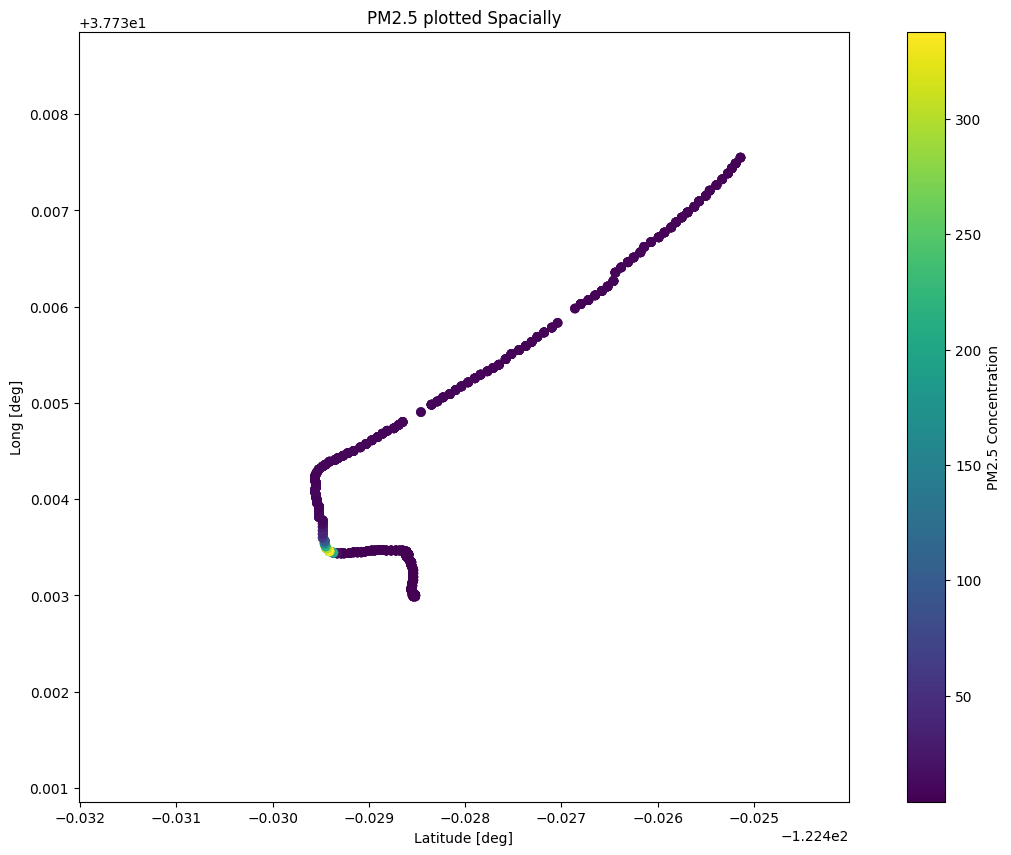

In [172]:



# Combine latitude and longitude to create shapely Point objects
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]


# Range around the central point
lat_range = .004# 0.5 degrees of latitude to each side of the central point
lon_range = 0.004 # 0.5 degrees of longitude to each side of the central point

# Create a GeoDataFrame
geo_df = gpd.GeoDataFrame(data, geometry=geometry)

# Create a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Plot the world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='white', edgecolor='black')

# Plot your data
geo_df.plot(ax=ax, column='PM25', cmap='viridis', legend=True, 
            legend_kwds={'label': "PM2.5 Concentration"})

# Set the limits to zoom in
ax.set_xlim(central_longitude - lon_range, central_longitude + lat_range)
ax.set_ylim(central_latitude - lat_range, central_latitude + lat_range)
ax.set_xlabel('Latitude [deg]')
ax.set_ylabel('Long [deg]') 

plt.title("PM2.5 plotted Spacially")

# plt.show()

In [175]:
print( central_latitude)
print(central_longitude)

37.7348568512241
-122.42801497175142


## Graveyard


In [34]:

# Define the column names if the file does not have a header
# column_names = ['TimeStamp', 'Latitude', 'Longitude', 'Altitude', 'PM25', 'RelativeHumidity', 'Temperature', 'vocIndex', 'noxIndex', 'ButtonPress', 'PressurehPa']

# # Reading the data with column names
# data = pd.read_csv(file_path, names=column_names)

'TimeStamp'

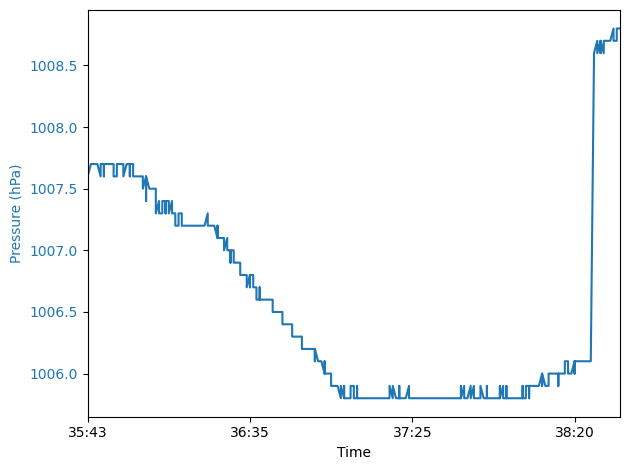

In [168]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Adjust timestamp
TimeZoneAdjust = -8
data["TimeStampAdjusted"] = change_time_zone(data.TimeStamp, TimeZoneAdjust)
data["TimeStampAdjusted"] = change_time_zone(data.TimeStamp, TimeZoneAdjust)


# Create a new figure and a subplot
fig, ax1 = plt.subplots()

# Plotting Pressure on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Pressure (hPa)', color=color)
ax1.plot(data['TimeStampAdjusted'], data['PressurehPa'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# # Create a second y-axis for PM2.5
# ax2 = ax1.twinx()  
# color = 'tab:red'
# ax2.set_ylabel('PM2.5', color=color)
# ax2.plot(data['TimeStampAdjusted'], data['PM25'], color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# Format the date-time ticks
# start_time = data.TimeStamp[0][0:1] 

start_time = data["TimeStampAdjusted"][0]
final_Index = np.size(data.TimeStampAdjusted)-1; 
end_time = data["TimeStampAdjusted"][final_Index]

# Rotate the date-time labels for better readability
# plt.xticks(rotation=45)
ax1.set_xlim(start_time, end_time)
# ax1.set_xlabel('')
# ax2.set_xlabel('')
ax1.set_xticks(np.arange(0, len(data.TimeStamp)/6, 50))

# Show the plot
fig.tight_layout()
plt.show()


# Show the plot
fig.tight_layout()  # Adjusts the plot to fit into the figure area.
plt.show()



In [158]:
end_time


'39:42'

In [130]:

type(data.TimeStamp)

pandas.core.series.Series

In [154]:
from datetime import datetime, timedelta
import numpy as np
TimeZoneAdjust = -8

def change_time_zone(uncorrected_time_zone_list, TimeZoneAdjustHours):
    corrected_time_zone_list = []

    for timestamp in uncorrected_time_zone_list:
        # Parse the timestamp into a datetime object
        dt = datetime.strptime(timestamp, '%H:%M:%S %d/%m/%Y')

        # Adjust the time zone
        adjusted_dt = dt + timedelta(hours=TimeZoneAdjustHours)

        # Convert back to the string format and add to the list
        corrected_time_zone_list.append(adjusted_dt.strftime('%H:%M:%S %d/%m/%Y')[3:8])

    return corrected_time_zone_list
